In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv('D:/UUM Bachelor of Computer Science with Honours/SEM 6 (A232)/SKIH3033 INFORMATION VISUALIZATION (GROUP A)/Project/news_v1.csv')

# Display column names and first few rows
print(df.columns)
print(df.head())

Index(['content_id', 'title', 'text', 'section', 'category', 'content_tier',
       'content_length', 'authors', 'published_date', 'keywords', 'summary',
       'url', 'top_image'],
      dtype='object')
   content_id                                              title  \
0     1398889  Foreign diplomats congratulate Sultan Ibrahim ...   
1     1398887  Vacant house made over into contraband cigaret...   
2     1398857  Five vehicles damaged by fallen tree in Tampar...   
3     1398828  Installation ceremony showcases uniqueness of ...   
4     1398814  'Wayang pacak' allows Malaysians to experience...   

                                                text section         category  \
0  KUALA LUMPUR: Foreign diplomats in Malaysia ex...    News           Nation   
1  KOTA KINABALU: Marine police personnel seized ...    News  Sabah & Sarawak   
2  KOTA KINABALU: A large tree fell and damaged f...    News  Sabah & Sarawak   
3  KUALA LUMPUR: The Installation Ceremony of Sul...    News   

In [25]:
df_half_2024 = df.loc[(df['published_date'] >= '2024-01-01') & (df['published_date'] < '2024-07-01')]

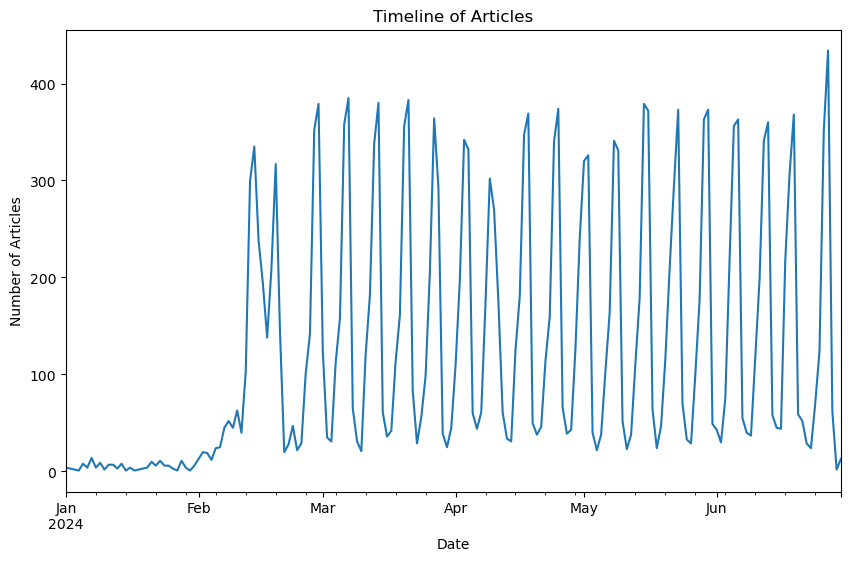

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1.1 Show Timeline of the Articles
plt.figure(figsize=(10, 6))
df_half_2024['published_date'].value_counts().sort_index().plot(kind='line')
plt.title('Timeline of Articles')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()

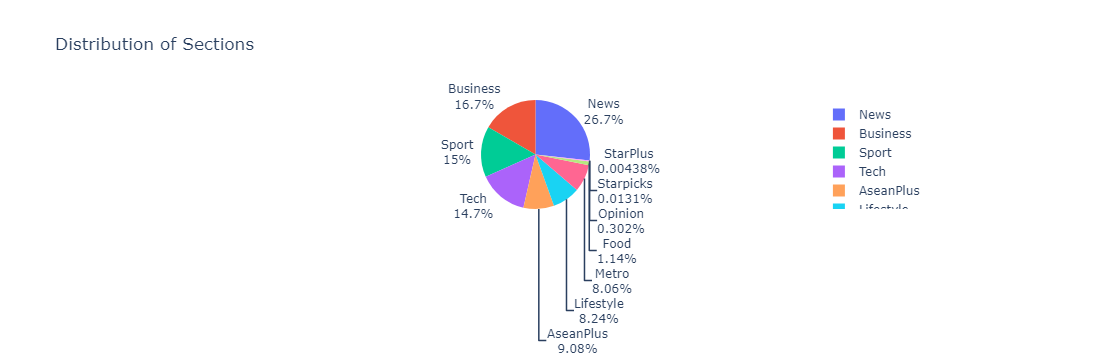

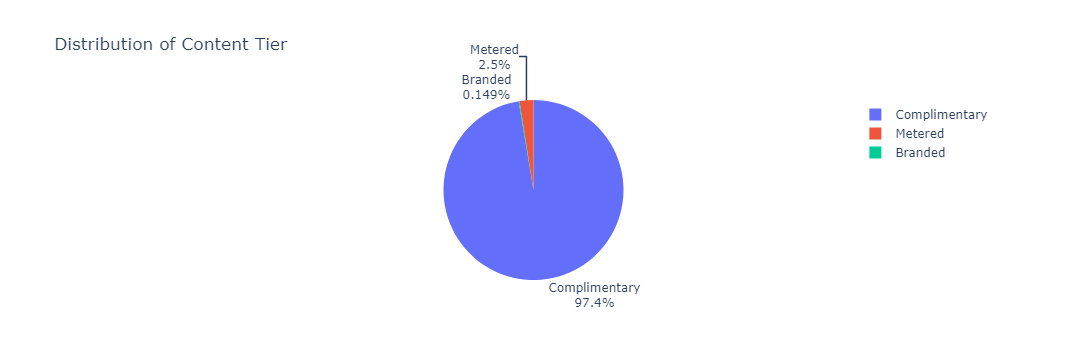

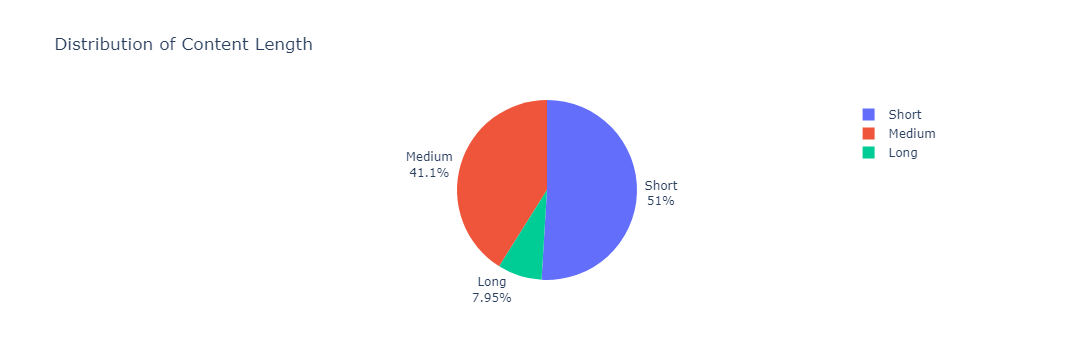

In [37]:
import plotly.express as px

# Pie chart for sections
section_counts = df_half_2024['section'].value_counts()
fig = px.pie(values=section_counts.values, names=section_counts.index, title='Distribution of Sections')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

# Pie chart for content tier
content_tier_counts = df_half_2024['content_tier'].value_counts()
fig = px.pie(values=content_tier_counts.values, names=content_tier_counts.index, title='Distribution of Content Tier')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

# Pie chart for content length
content_length_counts =df_half_2024['content_length'].value_counts()
fig = px.pie(values=content_length_counts.values, names=content_length_counts.index, title='Distribution of Content Length')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

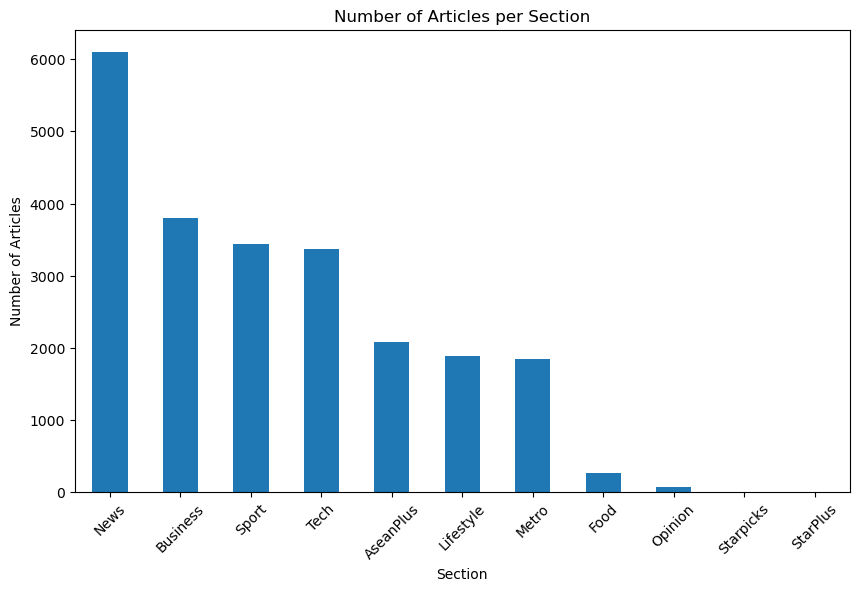

In [31]:
articles_per_section = df_half_2024['section'].value_counts()

plt.figure(figsize=(10, 6))
articles_per_section.plot(kind='bar')
plt.title('Number of Articles per Section')
plt.xlabel('Section')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Phiraphong\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Phiraphong\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Phiraphong\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\Phiraphong\AppData\Local\Temp\ipykernel_26980\861030140.py:33: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



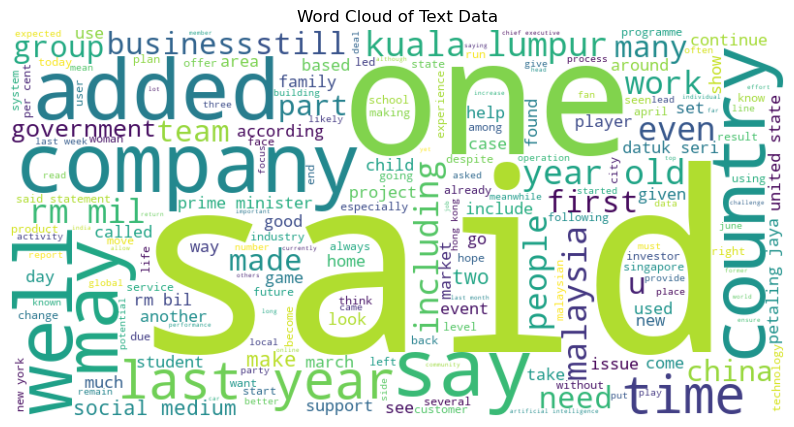

Most common words:
said: 85804
year: 39317
also: 30488
u: 19424
one: 17659
time: 17414
new: 17286
rm: 17097
would: 16373
company: 15060
last: 14838
two: 14371
first: 14058
malaysia: 13067
people: 12732
government: 11317
state: 11266
country: 10936
group: 10772
day: 10477


In [34]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Preprocessing function
def preprocess_without_specific_word(text):
    # Remove special characters and digits
    text = re.sub(r'\W', ' ', str(text))
    text = re.sub(r'\d', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Apply the preprocessing function
df_half_2024['clean_text'] = df_half_2024['text'].apply(preprocess_without_specific_word)

# Combine all text data
all_text = ' '.join(df_half_2024['clean_text'].dropna().tolist())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text Data')
plt.show()

# Word count
words = word_tokenize(all_text)
word_count = Counter(words)
common_words = word_count.most_common(20)

print("Most common words:")
for word, count in common_words:
    print(f"{word}: {count}")

In [38]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_with_specific_word(text):
    # Remove special characters and digits
    text = re.sub(r'\W', ' ', str(text))
    text = re.sub(r'\d', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and specific words
    stop_words = set(stopwords.words('english'))
    specific_words = {'said', 'year', 'also', 'u', 'one', 'time', 'new', 'rm', 'would','company','last', 'two', 'first', 'malaysia', 'people', 'government', 'state', 'country', 'group', 'day'}
    tokens = [word for word in tokens if word not in stop_words and word not in specific_words]
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

df_half_2024['clean_text'] = df_half_2024['text'].apply(preprocess_with_specific_word)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Phiraphong\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Phiraphong\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\Phiraphong\AppData\Local\Temp\ipykernel_26980\362862217.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Figure size 1000x600 with 0 Axes>

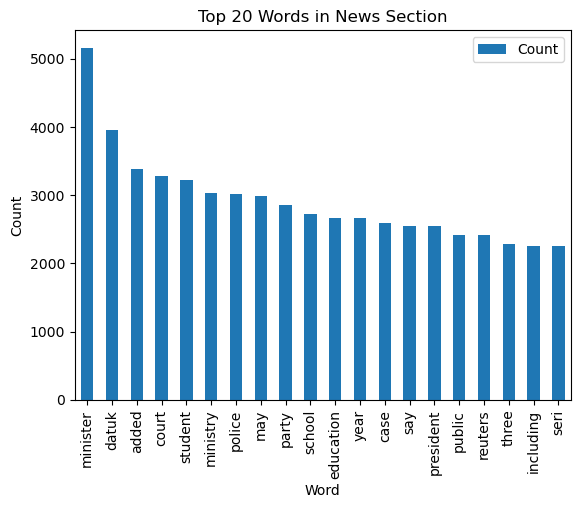

<Figure size 1000x600 with 0 Axes>

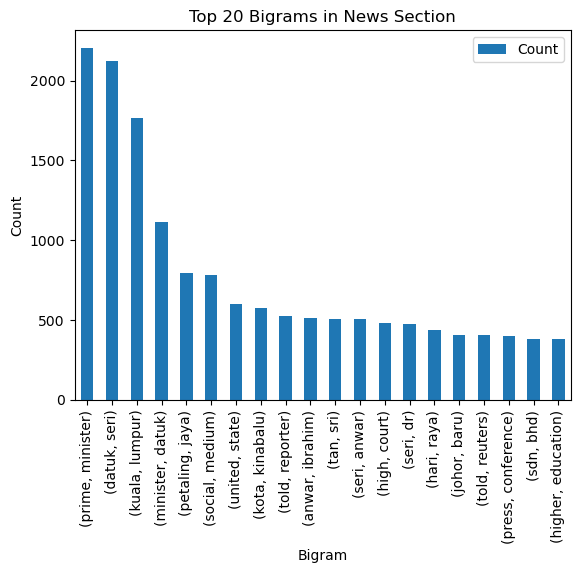

<Figure size 1000x600 with 0 Axes>

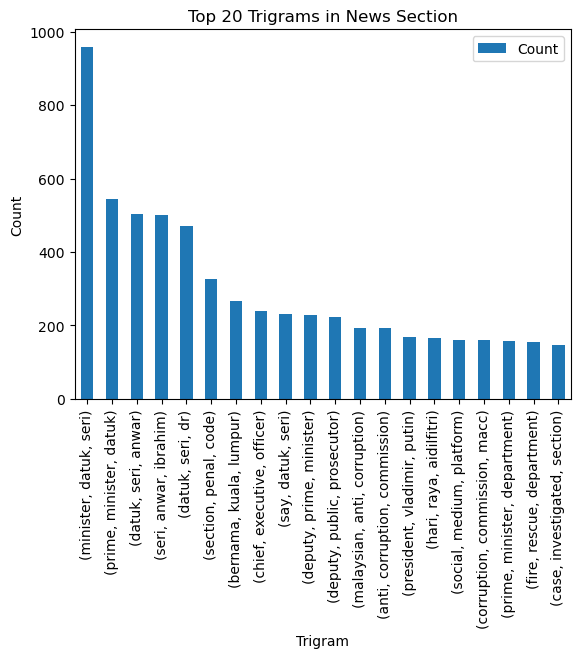

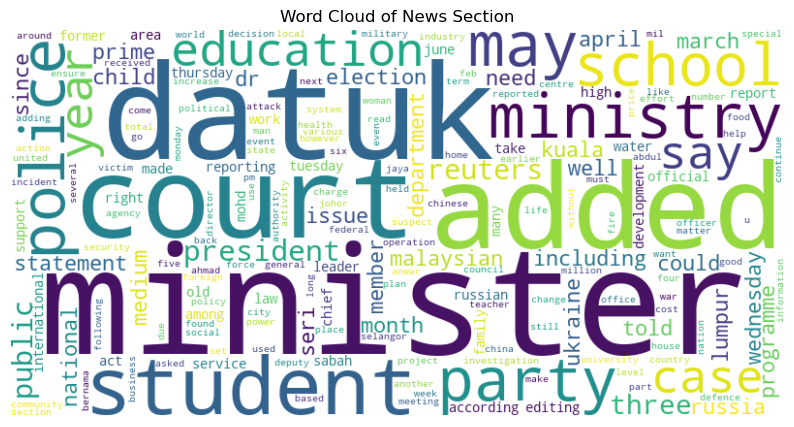

<Figure size 1000x600 with 0 Axes>

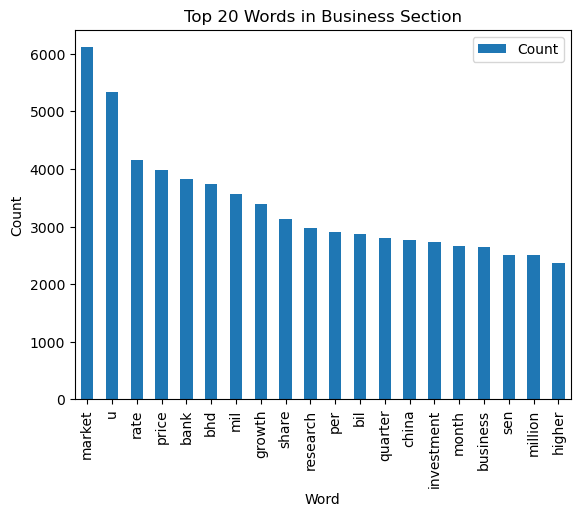

<Figure size 1000x600 with 0 Axes>

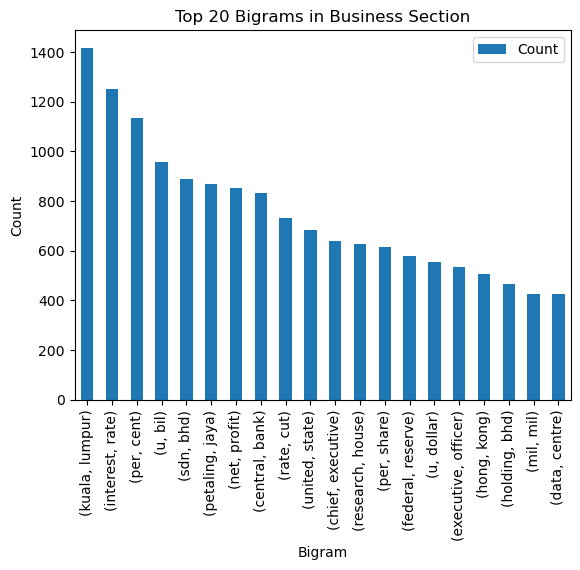

<Figure size 1000x600 with 0 Axes>

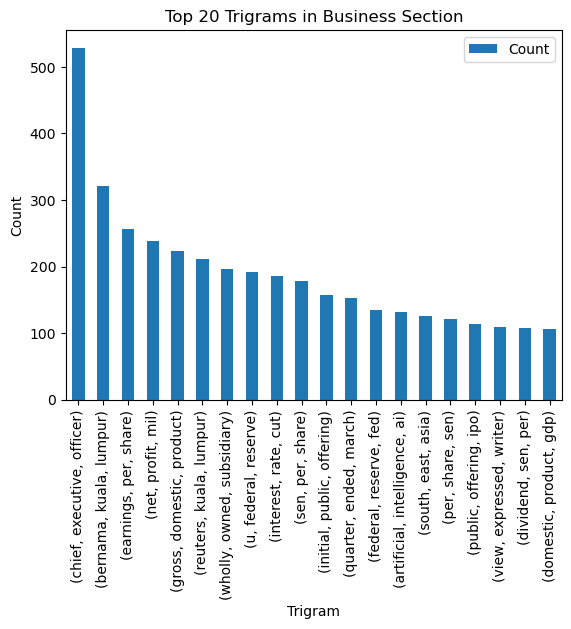

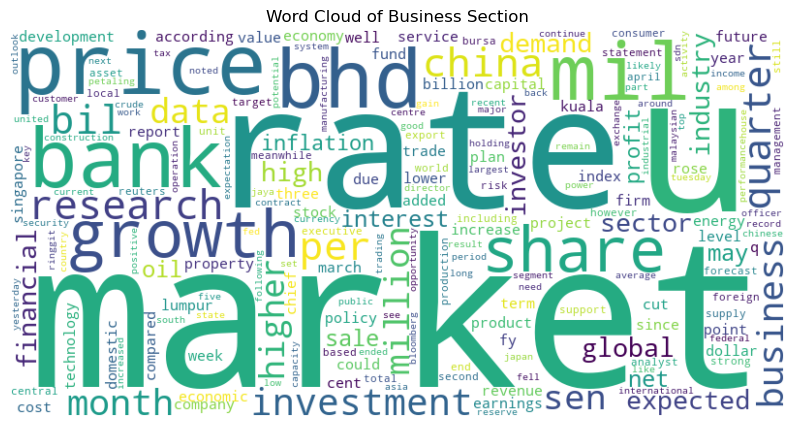

<Figure size 1000x600 with 0 Axes>

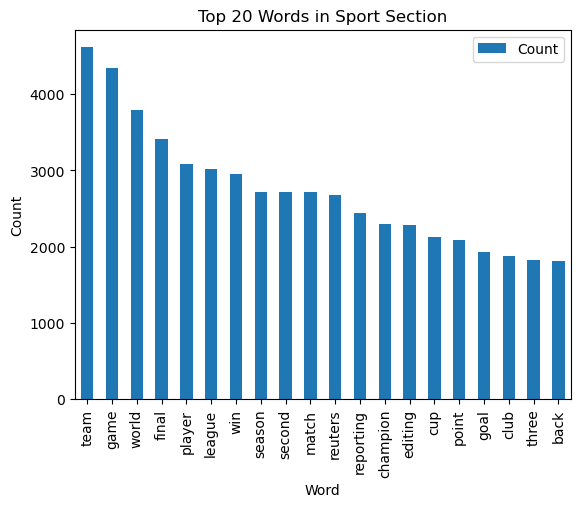

<Figure size 1000x600 with 0 Axes>

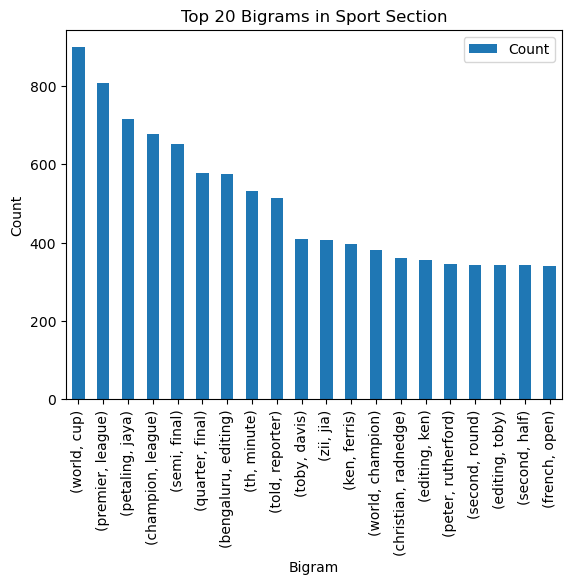

<Figure size 1000x600 with 0 Axes>

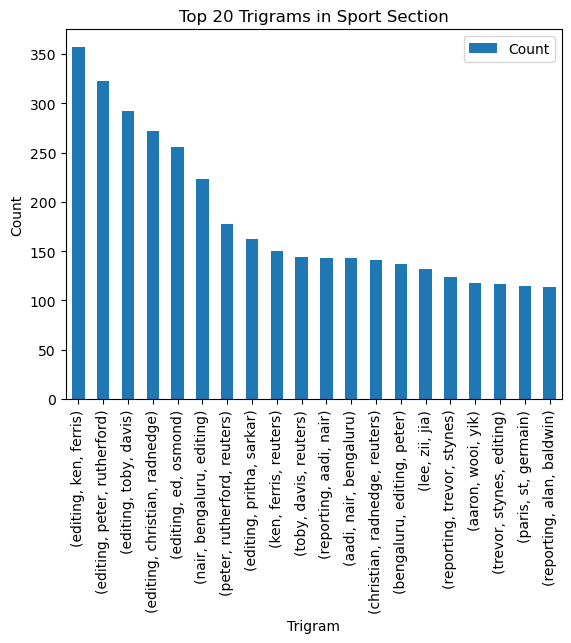

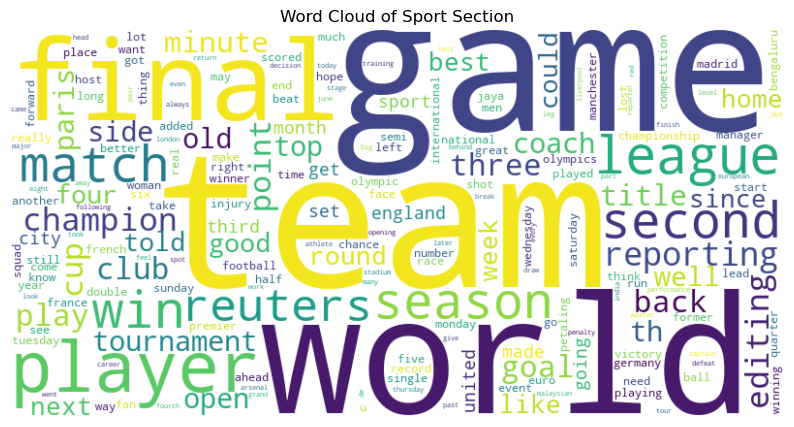

<Figure size 1000x600 with 0 Axes>

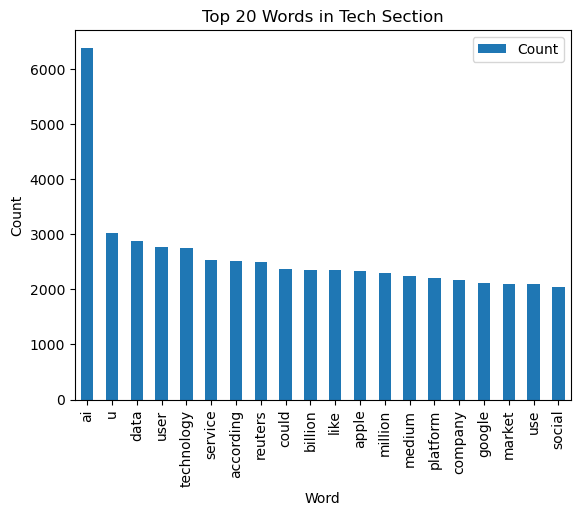

<Figure size 1000x600 with 0 Axes>

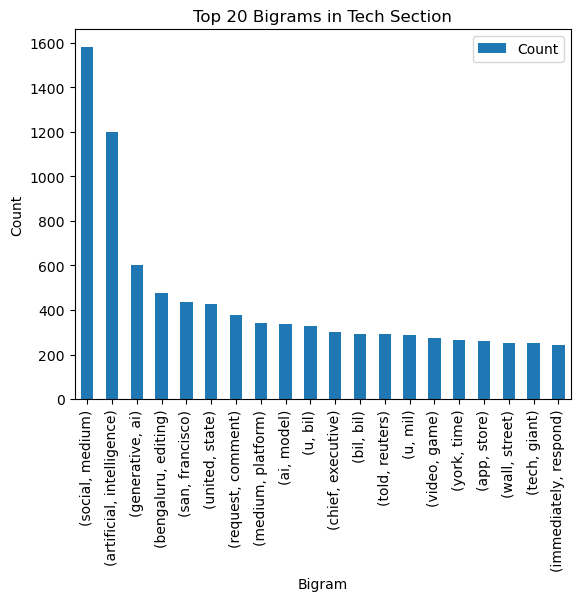

<Figure size 1000x600 with 0 Axes>

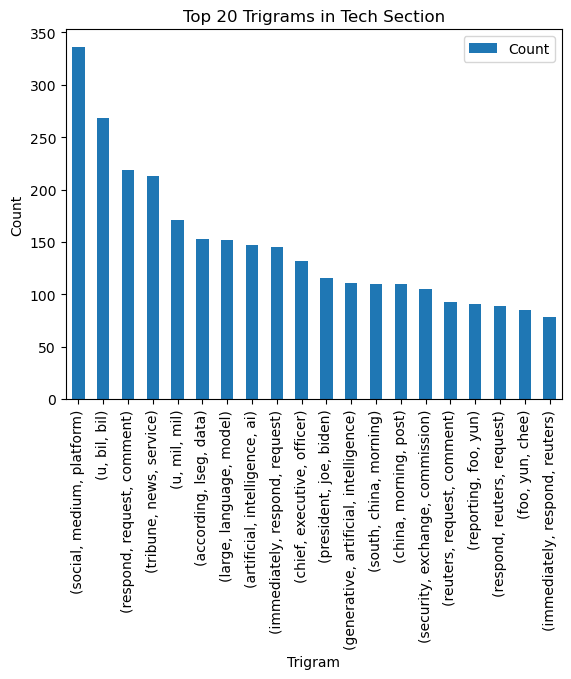

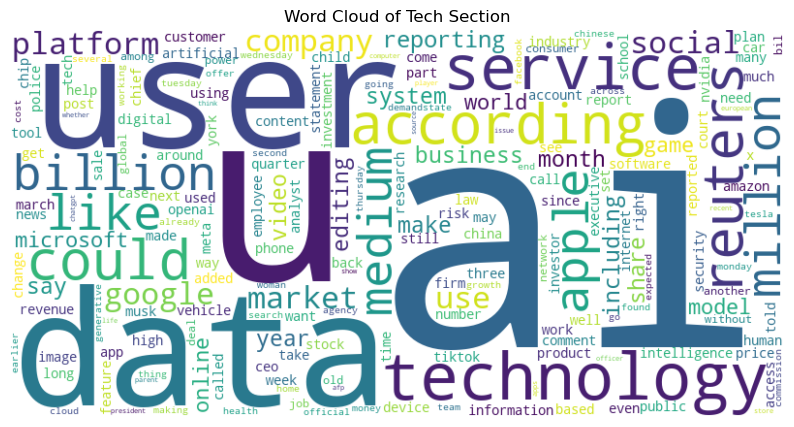

<Figure size 1000x600 with 0 Axes>

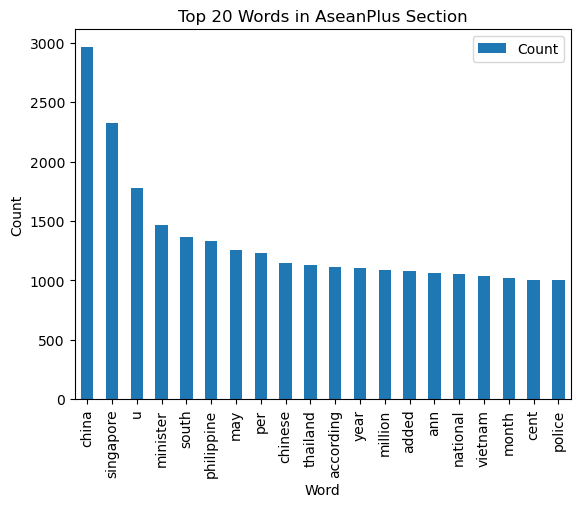

<Figure size 1000x600 with 0 Axes>

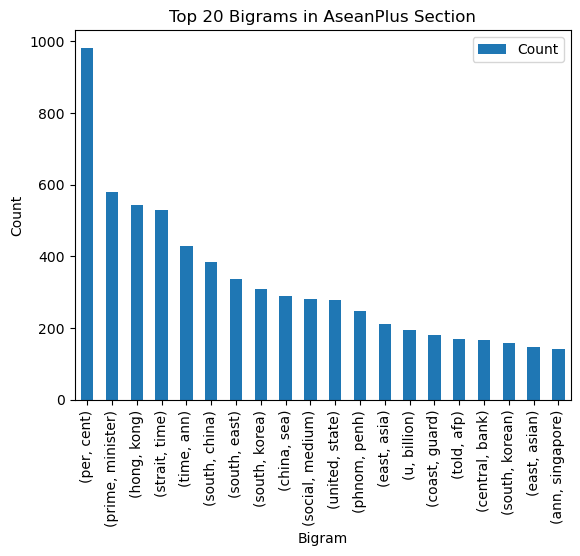

<Figure size 1000x600 with 0 Axes>

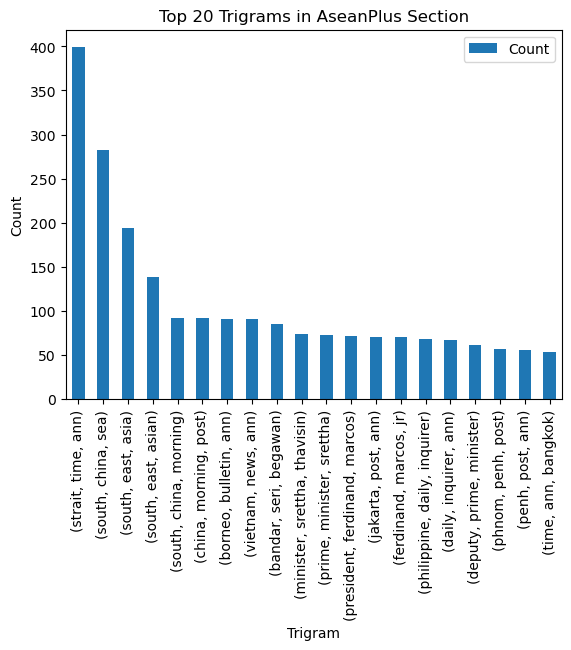

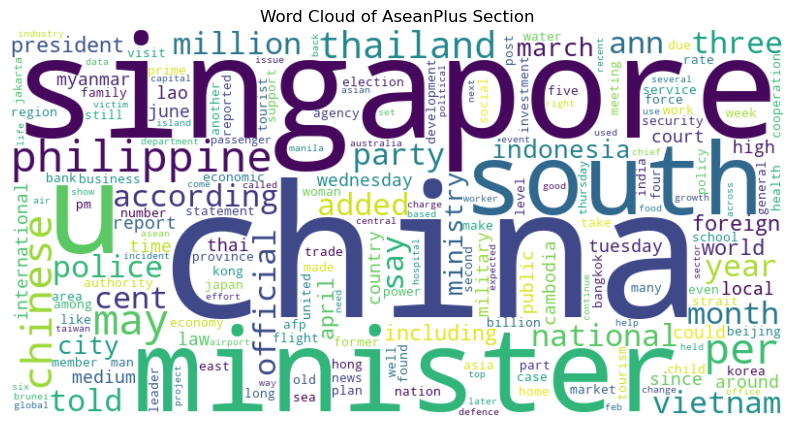

In [39]:
from nltk.util import ngrams
sections = ['News','Business', 'Sport', 'Tech', 'AseanPlus']
section_data = {section: df_half_2024[df_half_2024['section'] == section] for section in sections}

# Bigrams, trigrams, word cloud, and word count for each section
for section, data in section_data.items():
    all_tokens = [token for sublist in data['clean_text'] for token in sublist]

    # Word count
    plt.figure(figsize=(10, 6))
    pd.DataFrame(Counter(all_tokens).most_common(20), columns=['Word', 'Count']).set_index('Word').plot(kind='bar')
    plt.title(f'Top 20 Words in {section} Section')
    plt.xlabel('Word')
    plt.ylabel('Count')
    plt.show()
    
    # Bigrams
    bigrams = list(ngrams(all_tokens, 2))
    bigram_counts = Counter(bigrams)
    plt.figure(figsize=(10, 6))
    pd.DataFrame(bigram_counts.most_common(20), columns=['Bigram', 'Count']).set_index('Bigram').plot(kind='bar')
    plt.title(f'Top 20 Bigrams in {section} Section')
    plt.xlabel('Bigram')
    plt.ylabel('Count')
    plt.show()

    # Trigrams
    trigrams = list(ngrams(all_tokens, 3))
    trigram_counts = Counter(trigrams)
    plt.figure(figsize=(10, 6))
    pd.DataFrame(trigram_counts.most_common(20), columns=['Trigram', 'Count']).set_index('Trigram').plot(kind='bar')
    plt.title(f'Top 20 Trigrams in {section} Section')
    plt.xlabel('Trigram')
    plt.ylabel('Count')
    plt.show()

    # Word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(Counter(all_tokens))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud of {section} Section')
    plt.show()

In [ ]:
from textblob import TextBlob

C:\Users\Phiraphong\AppData\Local\Temp\ipykernel_26980\1618350844.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Phiraphong\AppData\Local\Temp\ipykernel_26980\1618350844.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Logistic Regression Accuracy: 0.89


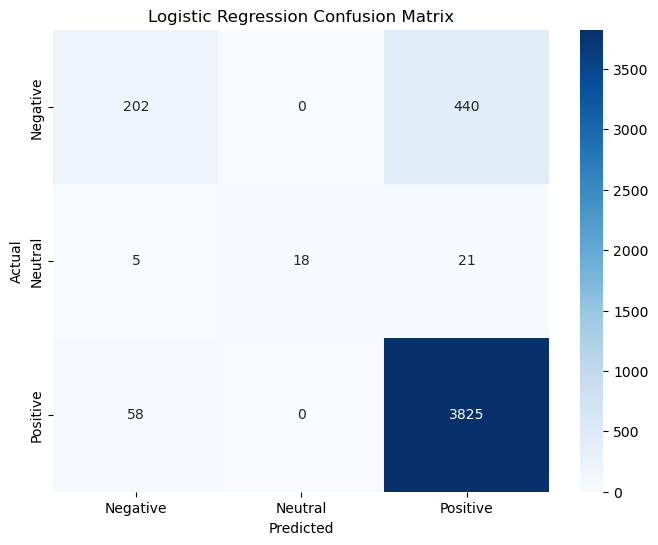

Multinomial Naive Bayes Accuracy: 0.86


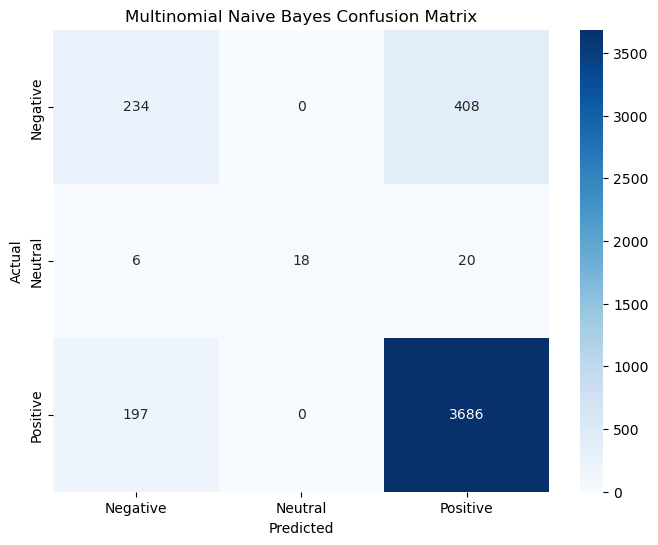

Linear SVC Accuracy: 0.89


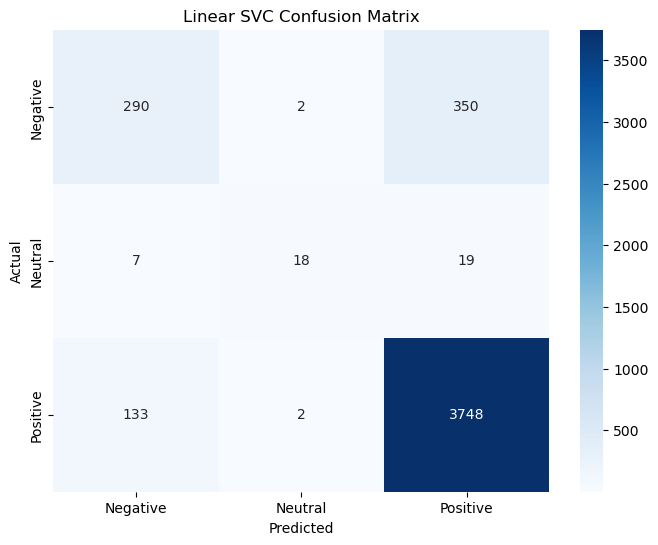

C:\Users\Phiraphong\AppData\Local\Temp\ipykernel_26980\1618350844.py:52: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




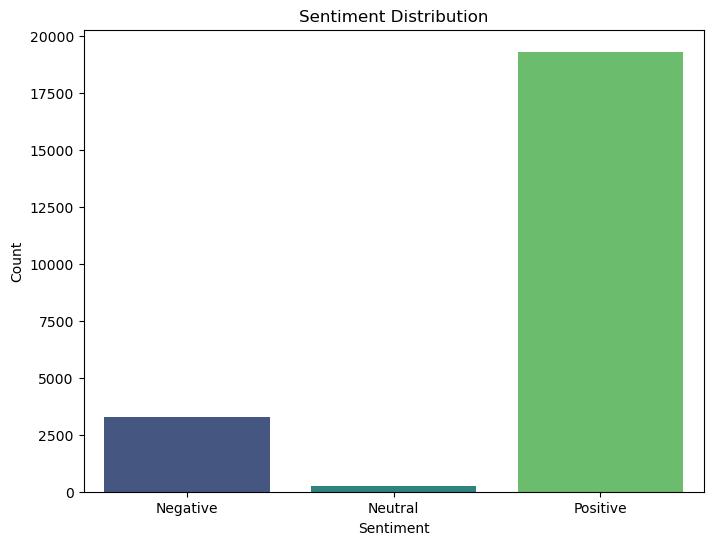


Logistic Regression Classification Report:
              precision    recall  f1-score      support
-1             0.762264  0.314642  0.445424   642.000000
0              1.000000  0.409091  0.580645    44.000000
1              0.892441  0.985063  0.936467  3883.000000
accuracy       0.885314  0.885314  0.885314     0.885314
macro avg      0.884902  0.569599  0.654179  4569.000000
weighted avg   0.875185  0.885314  0.864043  4569.000000

Multinomial Naive Bayes Classification Report:
              precision    recall  f1-score      support
-1             0.535469  0.364486  0.433735   642.000000
0              1.000000  0.409091  0.580645    44.000000
1              0.895965  0.949266  0.921846  3883.000000
accuracy       0.861895  0.861895  0.861895     0.861895
macro avg      0.810478  0.574281  0.645409  4569.000000
weighted avg   0.846313  0.861895  0.849974  4569.000000

Linear SVC Classification Report:
              precision    recall  f1-score      support
-1             0.6

In [49]:
# Convert the tokenized text back to a string format for vectorization
df_half_2024['clean_text_str'] = df_half_2024['clean_text'].apply(lambda x: ' '.join(x))

# Define sentiment labels
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    return 1 if polarity > 0 else -1 if polarity < 0 else 0

df_half_2024['sentiment'] = df_half_2024['text'].apply(get_sentiment)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_half_2024['clean_text_str'], df_half_2024['sentiment'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Linear SVC": LinearSVC()
}

# Train and evaluate classifiers
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train_vect, y_train)
    y_pred = clf.predict(X_test_vect)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        "accuracy": accuracy,
        "confusion_matrix": confusion_matrix(y_test, y_pred),
        "classification_report": classification_report(y_test, y_pred, output_dict=True)
    }

    print(f"{name} Accuracy: {accuracy:.2f}")

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(results[name]['confusion_matrix'], annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Sentiment distribution
sentiment_counts = df_half_2024['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Negative', 'Neutral', 'Positive'])
plt.show()

# Show classification reports
for name, result in results.items():
    print(f"\n{name} Classification Report:")
    print(pd.DataFrame(result['classification_report']).transpose())